In [1]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
T_df = pd.read_csv("https://zenodo.org/record/4276393/files/Fast_Pattern_Searching_robot_dog.csv?download=1")
T_df.head()

,Acceleration
0,0.89969
1,0.89969
2,0.89969
3,0.89969
4,0.89969


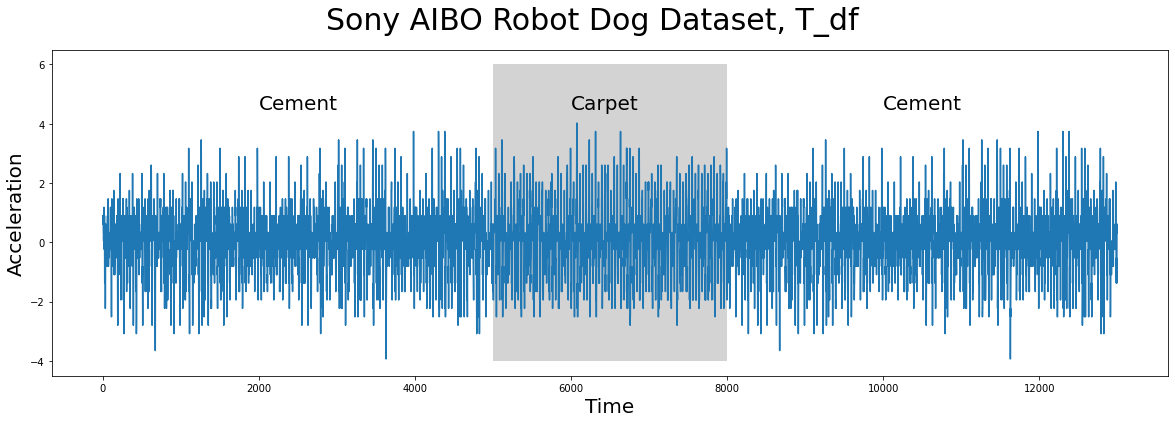

In [3]:
plt.suptitle('Sony AIBO Robot Dog Dataset, T_df', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(T_df)
plt.text(2000, 4.5, 'Cement', color="black", fontsize=20)
plt.text(10000, 4.5, 'Cement', color="black", fontsize=20)
ax = plt.gca()
rect = Rectangle((5000, -4), 3000, 10, facecolor='lightgrey')
ax.add_patch(rect)
plt.text(6000, 4.5, 'Carpet', color="black", fontsize=20)
plt.show()

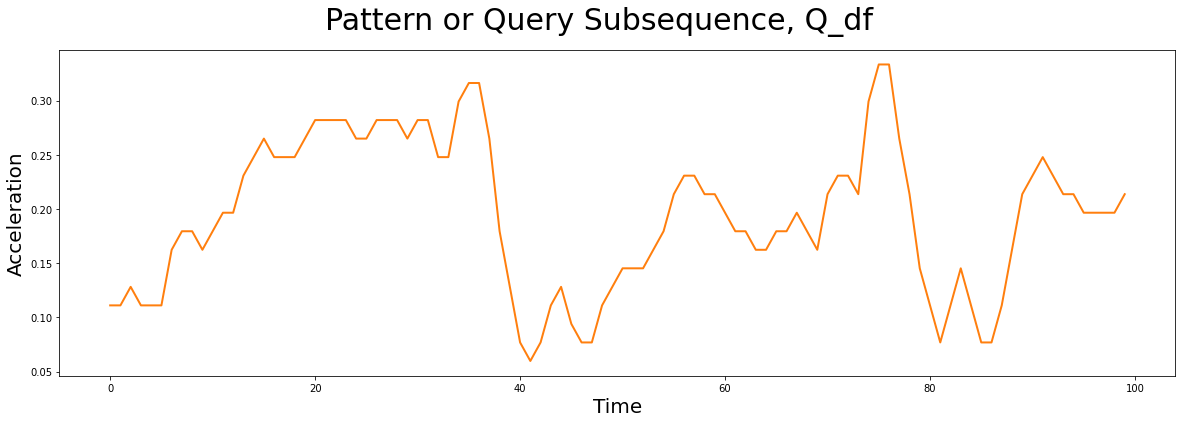

In [4]:
Q_df = pd.read_csv("https://zenodo.org/record/4276880/files/carpet_query.csv?download=1")

plt.suptitle('Pattern or Query Subsequence, Q_df', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(Q_df, lw=2, color="C1")  # Walking on cement
plt.show()

In [5]:
distance_profile = stumpy.mass(Q_df["Acceleration"], T_df["Acceleration"])

In [6]:
idx = np.argmin(distance_profile)

print(f"The nearest neighbor to `Q_df` is located at index {idx} in `T_df`")

The nearest neighbor to `Q_df` is located at index 7479 in `T_df`


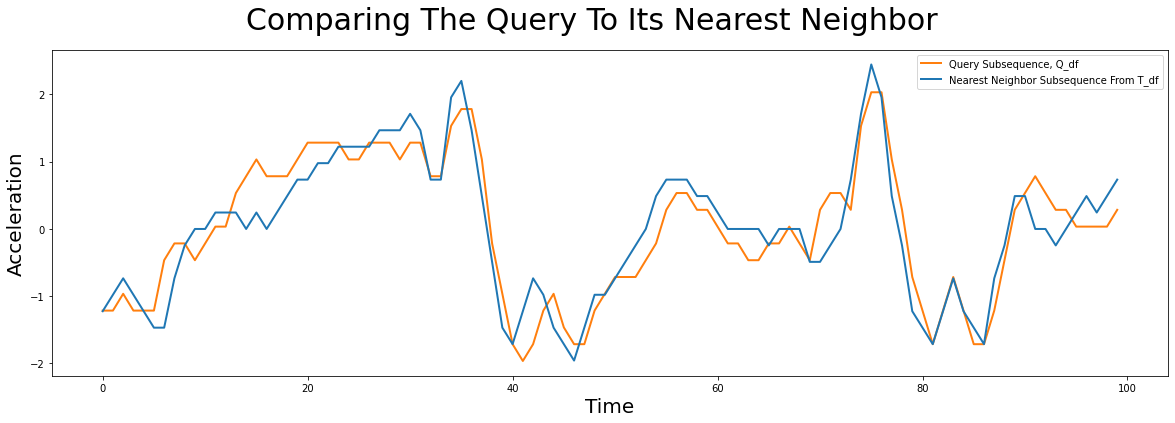

In [7]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
Q_z_norm = stumpy.core.z_norm(Q_df.values)
T_z_norm = stumpy.core.z_norm(T_df.values[idx:idx+len(Q_df)])

plt.suptitle('Comparing The Query To Its Nearest Neighbor', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(Q_z_norm, lw=2, color="C1", label="Query Subsequence, Q_df")
plt.plot(T_z_norm, lw=2, label="Nearest Neighbor Subsequence From T_df")
plt.legend()
plt.show()

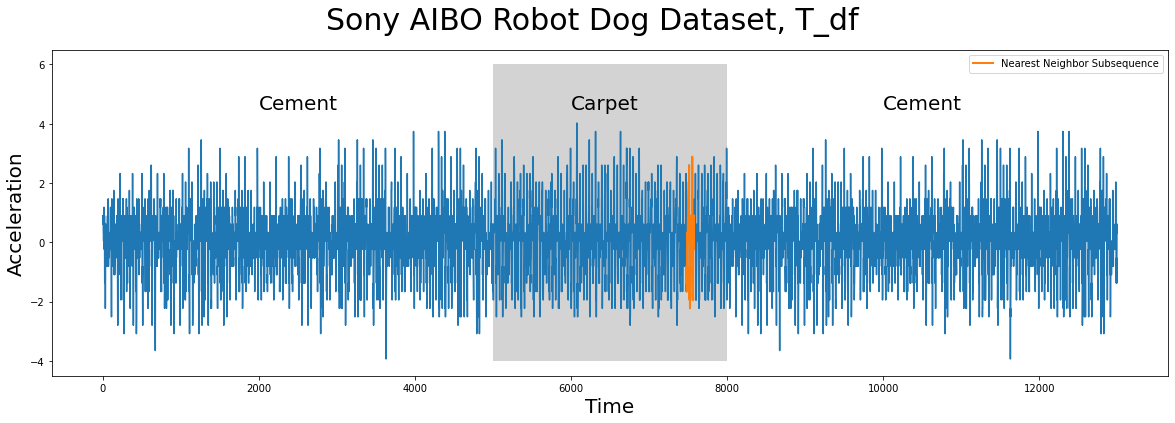

In [8]:
plt.suptitle('Sony AIBO Robot Dog Dataset, T_df', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(T_df)
plt.text(2000, 4.5, 'Cement', color="black", fontsize=20)
plt.text(10000, 4.5, 'Cement', color="black", fontsize=20)
ax = plt.gca()
rect = Rectangle((5000, -4), 3000, 10, facecolor='lightgrey')
ax.add_patch(rect)
plt.text(6000, 4.5, 'Carpet', color="black", fontsize=20)
plt.plot(range(idx, idx+len(Q_df)), T_df.values[idx:idx+len(Q_df)], lw=2, label="Nearest Neighbor Subsequence")
plt.legend()
plt.show()

In [9]:
# This simply returns the (sorted) positional indices of the top 16 smallest distances found in the distance_profile
k = 16
idxs = np.argpartition(distance_profile, k)[:k]
idxs = idxs[np.argsort(distance_profile[idxs])]

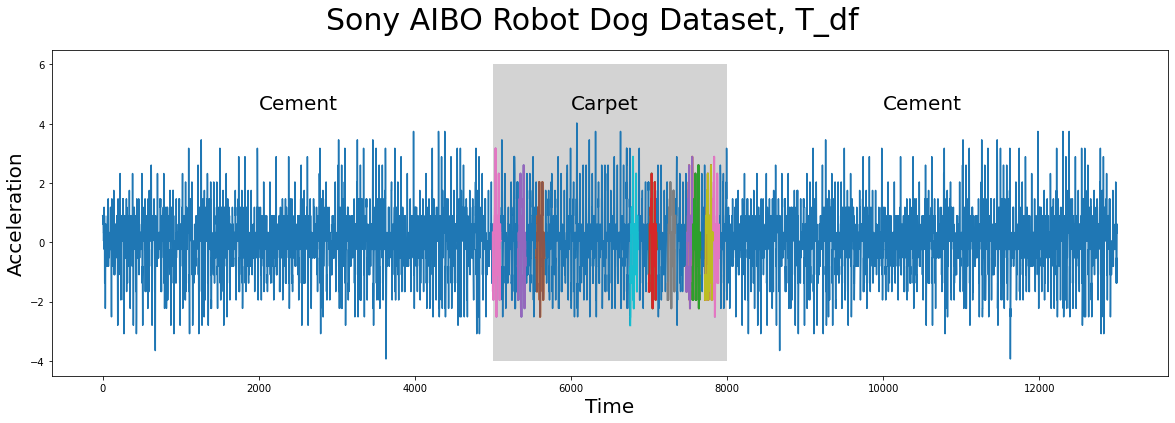

In [10]:
plt.suptitle('Sony AIBO Robot Dog Dataset, T_df', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
plt.plot(T_df)
plt.text(2000, 4.5, 'Cement', color="black", fontsize=20)
plt.text(10000, 4.5, 'Cement', color="black", fontsize=20)
ax = plt.gca()
rect = Rectangle((5000, -4), 3000, 10, facecolor='lightgrey')
ax.add_patch(rect)
plt.text(6000, 4.5, 'Carpet', color="black", fontsize=20)

for idx in idxs:
    plt.plot(range(idx, idx+len(Q_df)), T_df.values[idx:idx+len(Q_df)], lw=2)
plt.show()

In [11]:
matches = stumpy.match(Q_df["Acceleration"], T_df["Acceleration"])

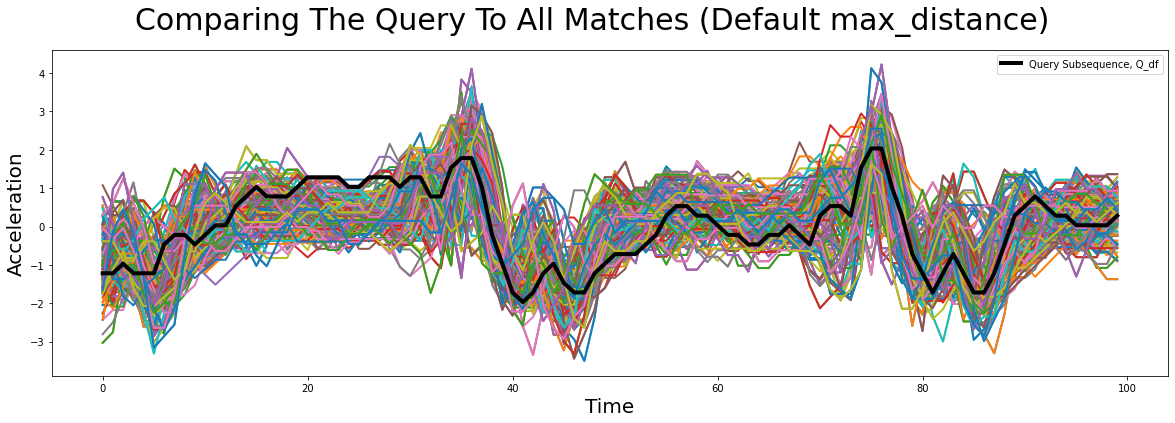

In [12]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
Q_z_norm = stumpy.core.z_norm(Q_df.values)

plt.suptitle('Comparing The Query To All Matches (Default max_distance)', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
for match_distance, match_idx in matches:
    match_z_norm = stumpy.core.z_norm(T_df.values[match_idx:match_idx+len(Q_df)])
    plt.plot(match_z_norm, lw=2)
plt.plot(Q_z_norm, lw=4, color="black", label="Query Subsequence, Q_df")
plt.legend()
plt.show()

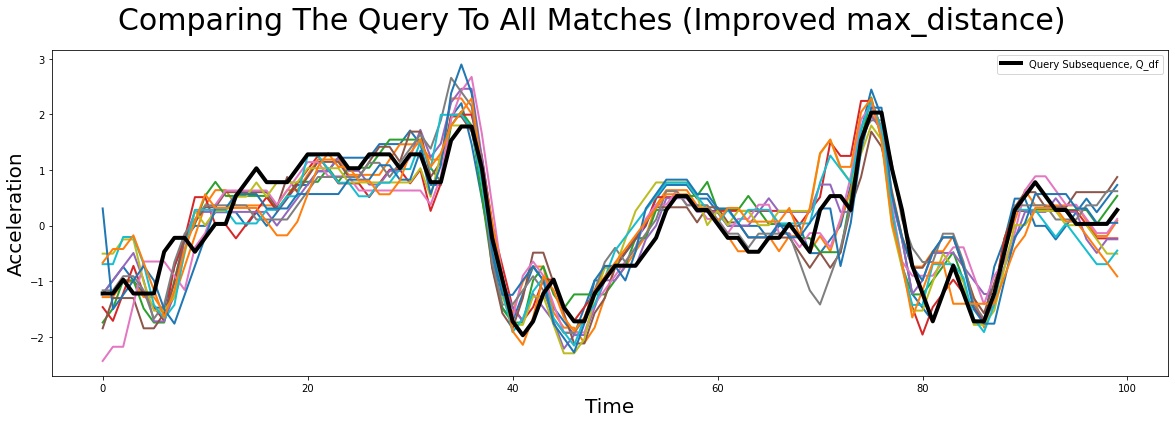

In [13]:
matches_improved_max_distance = stumpy.match(
    Q_df["Acceleration"],
    T_df["Acceleration"],
    max_distance=lambda D: max(np.mean(D) - 4 * np.std(D), np.min(D))
)

# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
Q_z_norm = stumpy.core.z_norm(Q_df.values)

plt.suptitle('Comparing The Query To All Matches (Improved max_distance)', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
for match_distance, match_idx in matches_improved_max_distance:
    match_z_norm = stumpy.core.z_norm(T_df.values[match_idx:match_idx+len(Q_df)])
    plt.plot(match_z_norm, lw=2)
plt.plot(Q_z_norm, lw=4, color="black", label="Query Subsequence, Q_df")
plt.legend()
plt.show()

In [19]:
m = Q_df["Acceleration"].size
# To set the exclusion zone to zero, set the denominator to np.`inf`
stumpy.config.STUMPY_EXCL_ZONE_DENOM = np.inf

matches_top_16 = stumpy.match(
    Q_df["Acceleration"],
    T_df["Acceleration"],
    max_distance=np.inf, # set the threshold to infinity include all subsequences
    max_matches=16,      # find the top 16 matches
)

stumpy.config.STUMPY_EXCL_ZONE_DENOM = 4 # Reset the denominator to its default value

In [15]:
npt.assert_equal(matches_top_16[:,1], idxs)

In [16]:
import time

def compute_naive_distance_profile(Q, T):
    Q = Q.copy()
    T = T.copy()
    n = len(T)
    m = len(Q)
    naive_distance_profile = np.empty(n - m + 1)

    start = time.time()
    Q = stumpy.core.z_norm(Q)
    for i in range(n - m + 1):
        naive_distance_profile[i] = np.linalg.norm(Q - stumpy.core.z_norm(T[i:i+m]))
    naive_elapsed_time = time.time()-start

    print(f"For n = {n} and m = {m}, the naive algorithm takes {np.round(naive_elapsed_time, 2)}s to compute the distance profile")

    return naive_distance_profile

In [17]:
Q_random = np.random.rand(100)
T_random = np.random.rand(1_000_000)

naive_distance_profile = compute_naive_distance_profile(Q_random, T_random)

For n = 1000000 and m = 100, the naive algorithm takes 34.26s to compute the distance profile


In [18]:
start = time.time()
mass_distance_profile = stumpy.mass(Q_random, T_random)
mass_elapsed_time = time.time()-start

print(f"For n = {len(T_random)} and m = {len(Q_random)}, the MASS algorithm takes {np.round(mass_elapsed_time, 2)}s to compute the distance profile")

For n = 1000000 and m = 100, the MASS algorithm takes 0.09s to compute the distance profile


In [20]:
npt.assert_almost_equal(naive_distance_profile, mass_distance_profile)